## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [25]:
import pandas as pd 

In [26]:
df = pd.read_csv("../data/owid-covid-data.csv")

In [27]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96864,ZWE,Africa,Zimbabwe,2021-06-15,40318.0,241.0,142.429,1637.0,2.0,2.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96865,ZWE,Africa,Zimbabwe,2021-06-16,40556.0,238.0,160.571,1640.0,3.0,2.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96866,ZWE,Africa,Zimbabwe,2021-06-17,40927.0,371.0,204.429,1647.0,7.0,3.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
96867,ZWE,Africa,Zimbabwe,2021-06-18,41335.0,408.0,235.286,1656.0,9.0,3.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [28]:
df_spain = df[df['location'] == "Spain"]

In [29]:
df_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
81984,ESP,Europe,Spain,2020-02-01,1.0,1.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
81985,ESP,Europe,Spain,2020-02-02,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,-1.08
81986,ESP,Europe,Spain,2020-02-03,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
81987,ESP,Europe,Spain,2020-02-04,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
81988,ESP,Europe,Spain,2020-02-05,1.0,0.0,NaN,NaN,NaN,NaN,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82484,ESP,Europe,Spain,2021-06-15,3745199.0,3432.0,4881.714,80579.0,62.0,38.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82485,ESP,Europe,Spain,2021-06-16,3749031.0,3832.0,4796.714,80615.0,36.0,40.429,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82486,ESP,Europe,Spain,2021-06-17,3753228.0,4197.0,3395.714,80634.0,19.0,24.143,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN
82487,ESP,Europe,Spain,2021-06-18,3757442.0,4214.0,3406.000,80652.0,18.0,21.571,...,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904,NaN


#### En este caso, utilizaremos las columnas:

#### Nuevos casos
#### Nuevos fallecidos
#### Población
#### Fallecidos totales
#### Casos totales
#### La fecha debe estar en el índice.

In [12]:
#df_spain.set_index(['date'], inplace = True)

In [30]:
df_spain = df_spain.loc[:, ['date', 'new_cases', 'new_deaths',  'total_deaths', 'total_cases', 'population']]
df_spain

,date,new_cases,new_deaths,total_deaths,total_cases,population
81984,2020-02-01,1.0,NaN,NaN,1.0,46754783.0
81985,2020-02-02,0.0,NaN,NaN,1.0,46754783.0
81986,2020-02-03,0.0,NaN,NaN,1.0,46754783.0
81987,2020-02-04,0.0,NaN,NaN,1.0,46754783.0
81988,2020-02-05,0.0,NaN,NaN,1.0,46754783.0
...,...,...,...,...,...,...
82484,2021-06-15,3432.0,62.0,80579.0,3745199.0,46754783.0
82485,2021-06-16,3832.0,36.0,80615.0,3749031.0,46754783.0
82486,2021-06-17,4197.0,19.0,80634.0,3753228.0,46754783.0
82487,2021-06-18,4214.0,18.0,80652.0,3757442.0,46754783.0


Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización

<AxesSubplot:xlabel='date'>

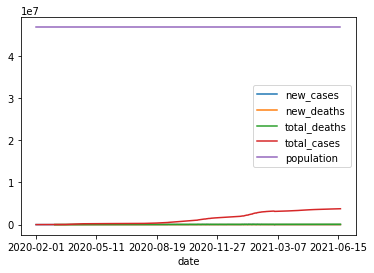

In [31]:
df_spain.set_index("date", inplace=True)
df_spain.plot()

In [7]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec

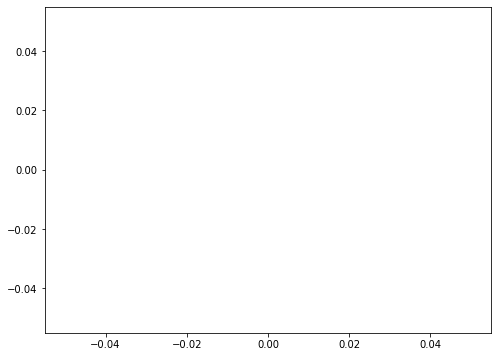

In [16]:
import matplotlib.pyplot as plt
#df.set_index("Year", inplace=True)
fig = plt.figure(df_spain)
#df_spain.set_index("date", inplace=True)
plt.plot()
fig.set_figheight(6)
fig.set_figwidth(8)
plt.show()

In [ ]:
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})
a0.plot(x, y)
a1.plot(y, x)

In [18]:
y = df_spain[['new_cases', 'new_deaths', 'location', 'total_deaths', 'total_cases']]
x = df_spain[['date']]
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(x, y)
ax1 = plt.subplot(gs[1])
ax1.plot(y, x)

KeyError: "None of [Index(['date'], dtype='object')] are in the [columns]"

In [21]:
df_spain = df_spain.drop('population',1)

In [22]:
df_spain

,new_cases,new_deaths,location,total_deaths,total_cases
date,,,,,
2020-02-01,1.0,NaN,Spain,NaN,1.0
2020-02-02,0.0,NaN,Spain,NaN,1.0
2020-02-03,0.0,NaN,Spain,NaN,1.0
2020-02-04,0.0,NaN,Spain,NaN,1.0
2020-02-05,0.0,NaN,Spain,NaN,1.0
...,...,...,...,...,...
2021-06-15,3432.0,62.0,Spain,80579.0,3745199.0
2021-06-16,3832.0,36.0,Spain,80615.0,3749031.0
2021-06-17,4197.0,19.0,Spain,80634.0,3753228.0


In [23]:
df_spain = df_spain.dropna()

In [12]:
Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?



Object `resultados` not found.


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
y = df_spain["new_cases"]
X = df_spain.drop("new_cases", 1)

In [45]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(),
    "DecisionTreeRegresor": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor(),
   
}

In [ ]:
def train_model(X_train, y_train, model, X_test, y_test):
    clf = model
    clf.fit(X_train, y_train)
    accuracies = cross_val_score(
        estimator=clf, X=X_train, y=y_train, cv=5, verbose=1)
    y_pred = clf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    score = clf.score(X_test, y_test)
    return (mae, mse, rmse, r2, y_pred, accuracies, score)

In [ ]:
for label, model in models.items():
    mae, mse, rmse, r2, y_pred, accuracies, score = train_model(
        X_train, y_train, model, X_test, y_test)
    print('')
    print('####### {} #######'.format(label))
    print('Score : %.4f' % score)
    print(accuracies)
    print('')
    print('MSE    : %0.2f ' % mse)
    print('MAE    : %0.2f ' % mae)
    print('RMSE   : %0.2f ' % rmse)
    print('R2     : %f ' % r2)

In [ ]:
k_fold = RepeatedKFold(n_splits=20, n_repeats=3, random_state=1)
iteracion = []
val_score = []
train_score = []
y_pred = []

linear_regression = LinearRegression()

for i, (train, val) in enumerate(k_fold.split(X_train)):
    #iteracion = str(i+1)
    iteracion.append(iteracion)
    linear_regression.fit(X_train[train], y_train[train])
    score_val = linear_regression.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = linear_regression.score(X_train[train], y_train[train])
    train_score.append(score_train)
    
    model_score = linear_regression.score(X_test, y_test)
    #model_score.append(model_score)
    y_pred = linear_regression.predict(X_test)
    #y_pred.append(y_pred)
    mse = mean_squared_error(y_test, y_pred)
    MSE.append(mse)
    mae = mean_absolute_error(y_test, y_pred)
    MAE.append(mae)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    RMSE.append(rmse)
    #r2 = r2_score(y_test, y_pred)
    
    

In [47]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================
from sklearn.model_selection import cross_validate

cv = RepeatedKFold(n_splits=3, n_repeats=5, random_state=123)
cv_scores = cross_validate(
                estimator = lr,
                X         = X_train,
                y         = y_train,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = cv,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.008973,0.009489,0.281628,0.193422,-8210.246431,-12318.439586
1,0.002932,0.002356,0.193182,0.201078,-11924.292840,-10790.356170
2,0.001996,0.001994,0.122669,0.260879,-13155.282984,-9995.493338
3,0.002990,0.001990,0.287984,0.194584,-6488.869165,-12831.466050
4,0.004647,0.002999,0.182441,0.220824,-15413.418103,-8317.272378
5,0.001987,0.002992,0.079638,0.242467,-10408.901170,-11541.990584
6,0.004472,0.001991,0.136528,0.246943,-11759.037994,-10786.166418
7,0.001227,0.002068,0.035949,0.244216,-10635.287935,-11523.203407
8,0.001994,0.001992,0.241139,0.163097,-11999.008217,-10778.765134
9,0.001941,0.000996,-0.063135,0.277925,-11825.686711,-11048.248235


In [49]:
predicciones = lr.predict(X_test)

In [50]:
df_predicciones = pd.DataFrame({'new_cases' : y_test, 'prediccion' : predicciones})
df_predicciones.head()

,new_cases,prediccion
date,,
2021-05-05,6317.0,10243.839476
2021-05-17,11061.0,8810.673495
2020-03-12,0.0,2472.298481
2021-06-14,8167.0,7414.233158
2020-04-11,4754.0,13194.259627


In [51]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

11840.205519350617

In [28]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np

In [29]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, random_state=7, shuffle=True)

    if name == 'PR':  # Por utilizar el modelo del polinomio
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    
    else:  # Para cualquier otro caso
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -6897.870432 (597.027751)
PR: -9587.968055 (8635.996443)
SVR: -7572.692961 (1245.537051)
DTR: -4092.616517 (826.176653)
RFR: -3354.042662 (718.694399)


In [31]:
print(X_train[train_index])
y_pred = lin_reg_model.predict(X_train[train_index])
y_pred_val = lin_reg_model.predict(X_train[val_index])
print(y_pred)

NameError: name 'train_index' is not defined

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [41]:
pipe = Pipeline(steps=[('LR', LinearRegression())])

rand_forest = RandomForestRegressor()

svr = Pipeline(steps=[
    ("scaler", StandardScaler()),   
    ("selectkbest", SelectKBest()),
    ("svm", SVR())])

rand_forest = DecisionTreeRegressor()



rand_forest_params = {
    'n_estimators': [10, 100, 1000],
    'max_features': [1,2,3]
}

svr_params = {
    'selectkbest__k': [1,2,3],
    'svr__kernel': ('linear', 'rbf', 'sigmoid'),
    'svr__C': [0.001, 0.1, 0.5, 1, 5, 10],
    'svr__gamma': ('scale', 'auto')
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    rand_forest_params,
    svr_params
    
    ]

In [44]:
%%time

cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
# Create grid search 
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=1, n_jobs=-1)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
svc_ganador_entrado = best_model.best_estimator_.get_params()['classifier']
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
#SAVE MODEL
# save the model to disk
filename = 'finished_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

Fitting 10 folds for each of 117 candidates, totalling 1170 fits


ValueError: Invalid parameter max_features for estimator Pipeline(steps=[('LR', LinearRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.

Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".